<a href="https://colab.research.google.com/github/majaszymajda/projektowanie_algorytm/blob/main/lista3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algorytmy arytmetyczne, liczby pierwsze i szybka transformacja Fouriera

# Zadanie 1  - liczby pierwsze


*  1.1 - rozkład na czynniki pierwsze
*  1.2 - generacja liczb pierwszych na podstawie algorytmu sita Erastostenesa





In [ ]:
import math
import random
import time 
import pylab
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt


In [ ]:
def czynniki_pierwsze(liczba):
  tab_czynnikow = []
  k = 2
  while liczba > 1 :
    while liczba%k == 0:
      tab_czynnikow.append(k)
      liczba = liczba/k
    k += 1

  return tab_czynnikow

In [ ]:

czynniki_pierwsze(12345)

[3, 5, 823]

In [ ]:
# sito Eratostenesa nie rekurencyjne
def sito_eratostenesa(liczba):
  tab = []
  liczba += 1
  t = [True] * liczba

  for i in range(4, liczba, 2):
    t[i] = False

  for i in range(3, math.ceil(math.sqrt(liczba)), 2):
    if t[i] == True:
      j = i 
      while j*i <= liczba:
        t[i*j] = False
        j+=2

  for i in range(2, liczba):
    if t[i] == True:
      # tab.append(i)
      print(i)
    
    # return tab
  

In [ ]:
sito_eratostenesa(23)


2
3
5
7
11
13
17
19
23



# Zadanie 2 - największy wspólny dzielnik
*   2.1 Wyszukiwanie najwiekszego wspólnego dzielnika

  1.   z wykorzystaniem rozkładu na czynniki pierwsze aczp(y,x)
  2.   z wykorzystaniem algorytmu Euklidesa aeuc(x,y)


*   2.2 Testy wydajności



In [ ]:
# nwd algorytm Euklidesa
def nwd_a_e(liczba1, liczba2):
  if liczba1 == liczba2:
    return liczba1
  elif liczba1>liczba2:
    return nwd_a_e(liczba1-liczba2, liczba2)
  else:
    return nwd_a_e(liczba2-liczba1, liczba1)


In [ ]:
nwd_a_e(51, 119)

17

In [ ]:
# nwd algorytmu euklidesa z tresci zadania
def aeuc(liczba1, liczba2):
  # print(liczba1, liczba2)
  if liczba2 == 0:
    return liczba1
  else:
    return aeuc(liczba2, liczba1%liczba2)

In [ ]:
aeuc(51, 119)

17

In [ ]:
def aczp(liczba1, liczba2):
  tab_czynn1 = czynniki_pierwsze(liczba1)
  tab_czynn2 = czynniki_pierwsze(liczba2)
  tab_czynn1 = sorted(tab_czynn1, reverse=True)
  tab_czynn2 = sorted(tab_czynn2, reverse=True)
  for i in range(len(tab_czynn1)):
    for j in range(len(tab_czynn2)):
      if tab_czynn1[i] == tab_czynn2[j]:
        return tab_czynn1[i]
        


In [ ]:
aczp(51, 119)

17

In [ ]:
# testy wydajnosci
def test_wydajnosci(k):
  index1 = [2, 5, 4, 3, 1, 3]
  index2 = [2, 5, 4, 2, 7, 6]
  tab_czas1 = []
  tab_czas2 = []
  dane = []
  x = 1
  for i in index1:
    x = x * index1[i]*index2[i]

  for i in range(k):
    y = x + (7*i)
    dane.append(y)

    start_1 = time.clock()
    aczp(x,y)
    end_1 = time.clock()
    t1 = end_1 - start_1
    tab_czas1.append(t1)

    start_2 = time.clock()
    aeuc(x,y)
    end_2 = time.clock()
    t2 = end_2 - start_2
    tab_czas2.append(t2)

  pylab.plot(dane, tab_czas1)
  pylab.title('Wykres dla funkcji 1 - aczp')
  pylab.grid(True)
  pylab.show()
  
  pylab.plot(dane, tab_czas2)
  pylab.title('Wykres dla funkcji 2 - aeuc')
  pylab.grid(True)
  pylab.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


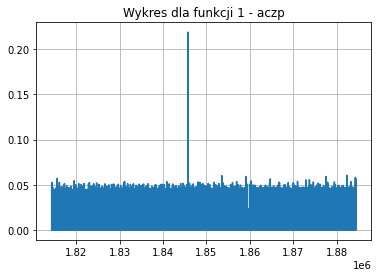

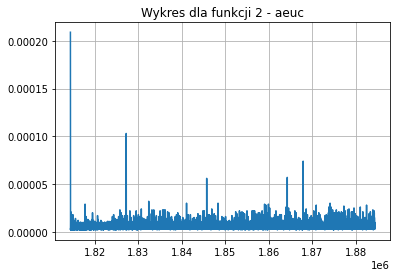

In [ ]:
test_wydajnosci(10000)

# Zadanie 3 - propabilistyczne testy pierwszości


*   test Fermata
*   test Millera-Rabina



In [ ]:
# test Fermata
def test_fermata(ile_razy, p):
  i = 0

  while i < ile_razy:
    a = random.randint(1, p-1)
    print(a)
    if pow(a, (p-1), p) == 1:
      i += 1
    else:
      return False
  return True



In [ ]:
test_fermata(15, 173)


67
138
70
100
101
149
43
152
103
56
88
44
86
147
155


True

In [ ]:
# test Millera-Rabina
def test_millera_rabina(ile_razy, liczba):
  d = liczba - 1
  s = 0 
  while d % 2 == 0:
    s += 1
    d = d/2
  for i in range(ile_razy):
    a = random.randint(2, liczba-2)
    print(a)
    z = a ** d % liczba
    if (z == 1) or (z == liczba-1):
      continue
    else:
      j = 1
      while (j<s) and (z != liczba-1):
        z = (z*z) % liczba
        if z == 1:
          return False
        else:
          return True
  return False


In [ ]:
test_millera_rabina(15, 173)

82
108
53
52
71
44
88
113
106
126
62
102
52
57
63


False

# Zadanie 4 - szybka transformacja Fouriera

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import matplotlib.gridspec as gridspec

In [ ]:
def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

def fft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    if N % 2 > 0:
        raise ValueError("must be a power of 2")
    elif N <= 2:
        return dft(x)
    else:
        X_even = fft(x[::2])
        X_odd = fft(x[1::2])
        terms = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + terms[:int(N/2)] * X_odd, X_even + terms[int(N/2):] * X_odd])

Text(0.5, 0, 'Index')

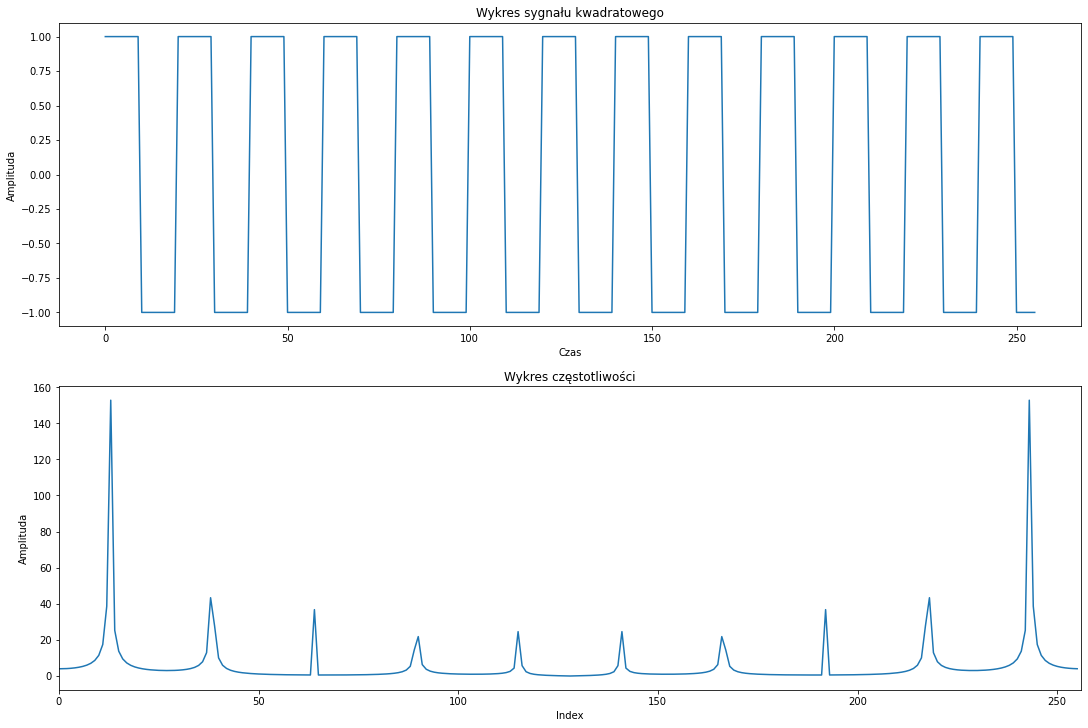

In [ ]:
fig = plt.figure(constrained_layout=True)
fig.set_size_inches(15, 10)
spec = gridspec.GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[1, 0])
 
N = 256
T = 1.0 / 100.0

x = np.linspace(0.0, N * T, N)
y = signal.square(2 * np.pi * 5 * x)

yf = fft(y)
xf = np.linspace(0.0, 1.0 / (2.0 * T), int(N / 2))

plt.subplot(ax1)
plt.plot(y)
plt.title('Wykres sygnału kwadratowego')
plt.ylabel('Amplituda')
plt.xlabel('Czas')

plt.subplot(ax2)
plt.plot(abs(yf))
plt.title('Wykres częstotliwości')
plt.xlim(0, 256)
plt.ylabel('Amplituda')
plt.xlabel('Index')

Text(0.5, 0, 'Częstotliwość')

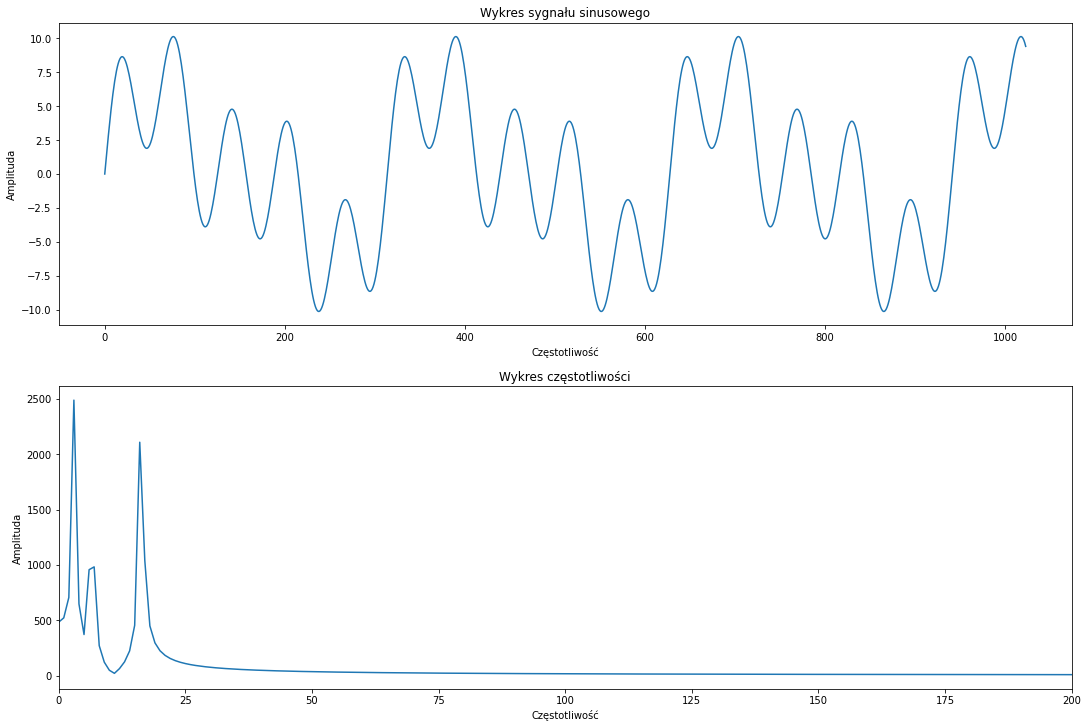

In [ ]:
fig2 = plt.figure(constrained_layout=True)
fig2.set_size_inches(15, 10)
spec2 = gridspec.GridSpec(ncols=1, nrows=2, figure=fig2)

ax1 = fig2.add_subplot(spec2[0, 0])
ax2 = fig2.add_subplot(spec2[1, 0])

N2 = 2**10
T2 = 1.0 / 50.0
x2 = np.linspace(0.0, N2 * T2, N2)

y2 = 5 * np.sin(x2) + 3 * np.sin(2 * x2) + 5 * np.sin(5 * x2)

yf2 = fft(y2)

plt.subplot(ax1)
plt.plot(y2)
plt.title('Wykres sygnału sinusowego')
plt.ylabel('Amplituda')
plt.xlabel('Częstotliwość')

plt.subplot(ax2)
plt.plot(abs(yf2))
plt.title('Wykres częstotliwości')
plt.xlim(0, 200)
plt.ylabel('Amplituda')
plt.xlabel('Częstotliwość')

# Zadanie 5 -  filtracja

In [ ]:

def Okno_Hamminga(t):
    new = []
    for i in t:
        new.append(0.5 * ( 1- np.cos ((2 * np.pi * i)/ (len(t)-1))))
    return new


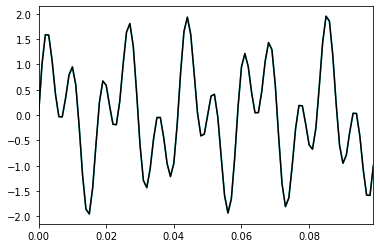

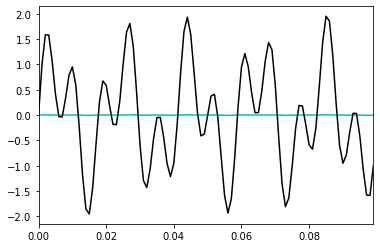

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


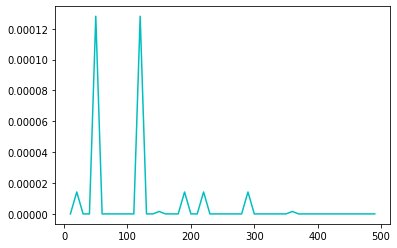

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


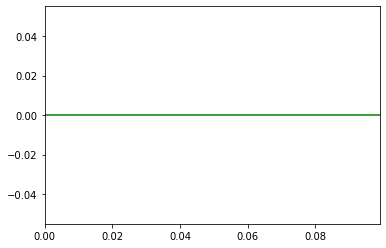

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


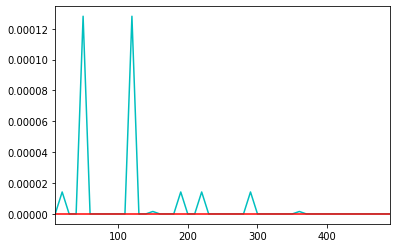

In [ ]:
#tworzemy dataset
dt = 0.001
t = np.arange(0, 0.1, dt)

#sygnał wejściowy
f = np.sin(2 *t * np.pi*50) +  np.sin(240*t* np.pi) #probka sygnalu
f_clean = f

#dodajemy szum
f1 = f #+ 2.5* np.random.randn(len(t))

# okno Hamminga
fO = f1 * Okno_Hamminga(f1) 

#wyświetla podstawowy sygnal i szumy; czarny- czysty, niebieski - zniekształcony

plt.plot(t, f1, color = 'c') #sygnał z szumami
plt.plot(t, f_clean, color= 'k')# czysty sygnał
plt.xlim(t[0], t[-1])
plt.show()


plt.plot(t, fO, color = 'c') #sygnał z szumami po przejściu przez okno Hamminga
plt.plot(t, f_clean, color= 'k')# czysty sygnał
plt.xlim(t[0], t[-1])
plt.show()


n  = len(t)
fhat = np.fft.fft(fO, n) #transformata fouriera (zwraca complex wspolczynniki)
PSD = fhat * np.conj(fhat)/ n # podnosimy do kwadratu, bo to urojone)
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1, np.floor(n/2), dtype = 'int')

#wykres pokazujacy czestotliwosc w psd
plt.plot(freq[L], PSD[L], color = 'c')
plt.show()

# znajduje wszystkie czestotliwosci o wysokiej mocy i zachowuje je, a resztę zeruje
indices= PSD >50 
PSDclean = PSD * indices
fhat = indices * fhat
ffilt = np.fft.ifft(fhat) #odwrotna fft

#wyswietla odfiltrowany sygnal
plt.plot(t, ffilt, color = 'g')
plt.xlim(t[0], t[-1])
plt.show()

#wyświetla 
plt.plot(freq[L], PSD[L], color= 'c')
plt.plot(freq[L], PSDclean[L], color = 'r')
plt.xlim(freq[L[0]], freq[L[-1]])

plt.show()
